In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

# EDA and Data Cleaning

In [69]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
# df.shape
# df.describe()
# df.info()
# df.columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
# df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
# df.duplicated().sum()

np.int64(0)

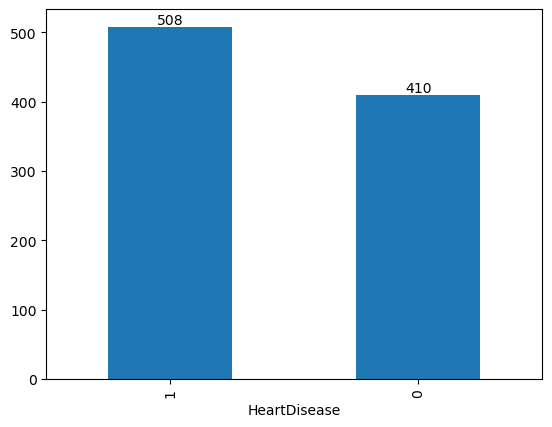

In [22]:
ax = df['HeartDisease'].value_counts().plot(kind='bar')
for x in ax.containers:
    ax.bar_label(x)

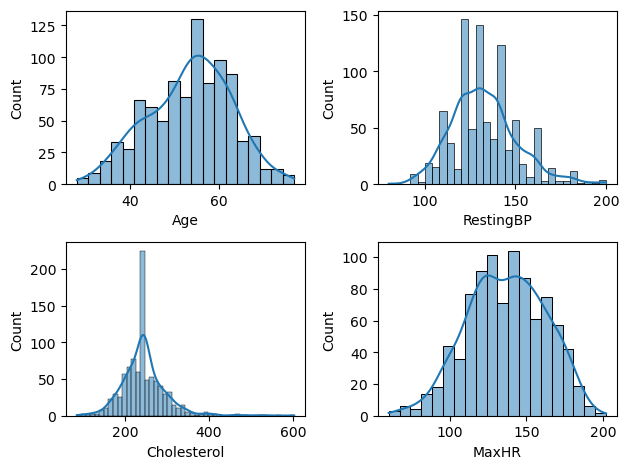

In [53]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()  

In [37]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [70]:
# There are 172 people whose Cholesterol is 0 which is not possible, so take mean of all Cholestrol data and replace 0 with that mean.

cholestrolMean = df.loc[df['Cholesterol']!=0, 'Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0,cholestrolMean)


In [40]:
df['Cholesterol'].value_counts()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='RestingBP', ylabel='Count'>

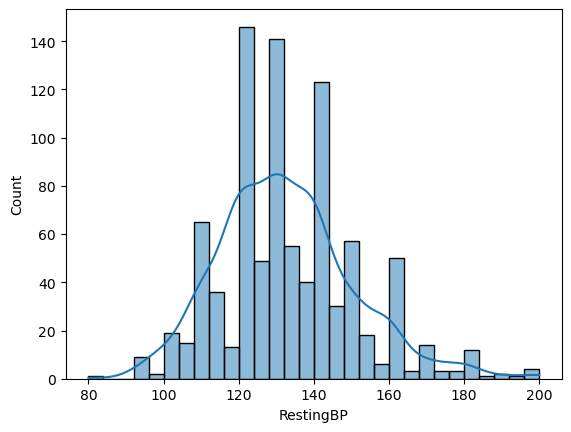

In [71]:
# There is 1 person whose RestingBP is 0 which is not possible, so take mean of all of RestingBP data and replace 0 with that mean.
# df['RestingBP'].value_counts()

restingBPMean = df.loc[df['RestingBP']!= 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0,restingBPMean)

sns.histplot(x=df['RestingBP'], kde=True)


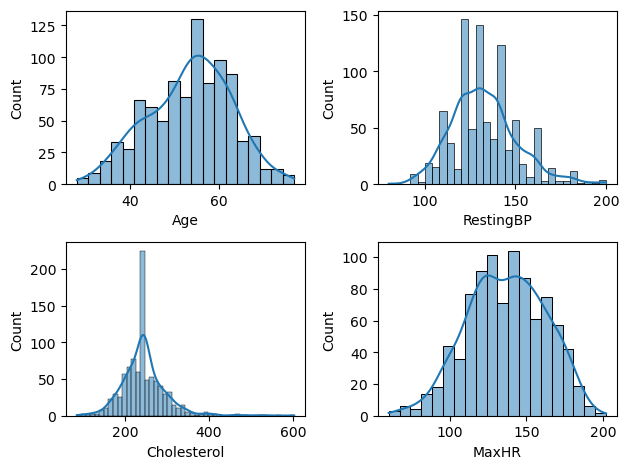

In [52]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

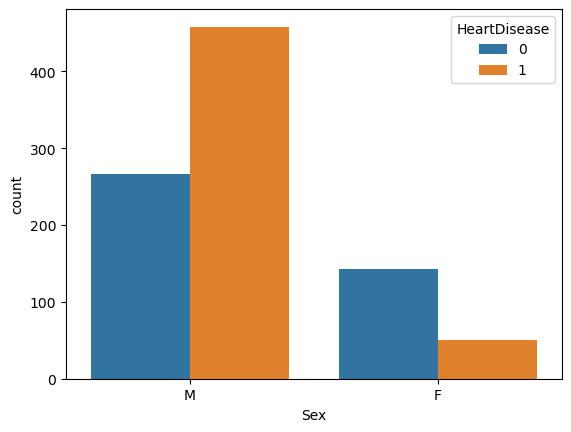

In [58]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')

<Axes: xlabel='ChestPainType', ylabel='count'>

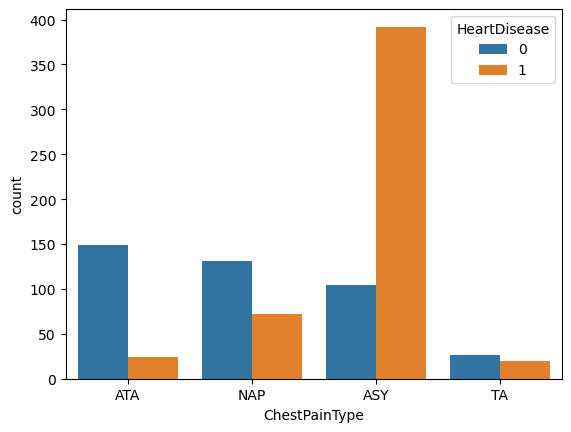

In [59]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

<Axes: xlabel='FastingBS', ylabel='count'>

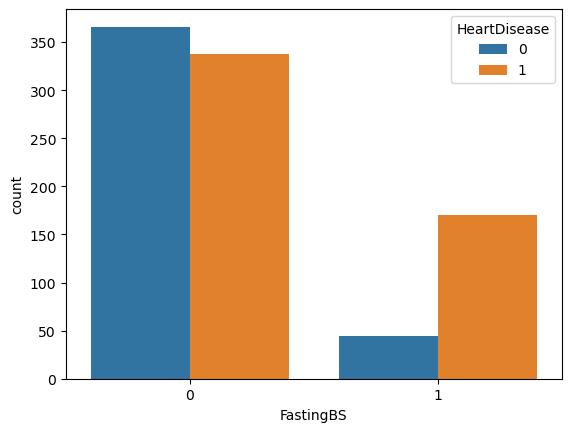

In [61]:
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

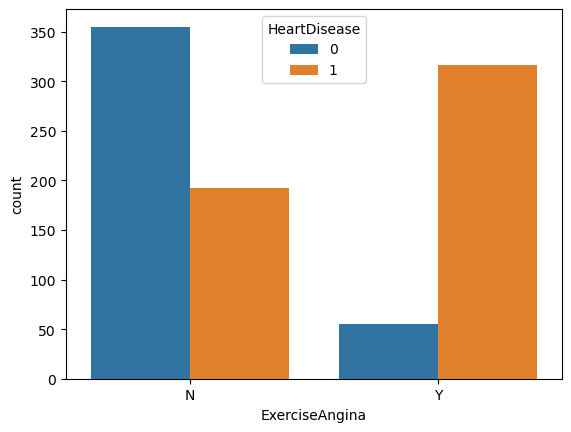

In [62]:
sns.countplot(x=df['ExerciseAngina'], hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

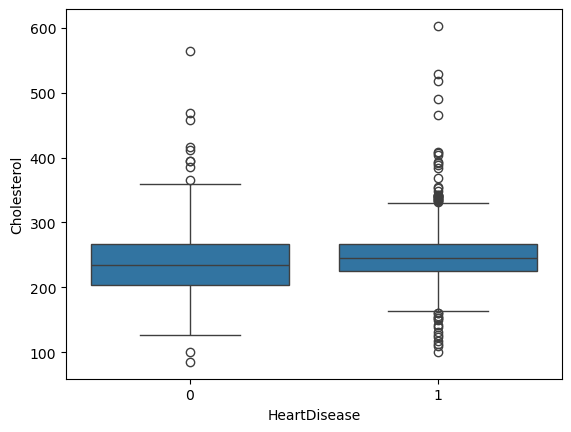

In [64]:
sns.boxplot(x=df['HeartDisease'], y=df['Cholesterol'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

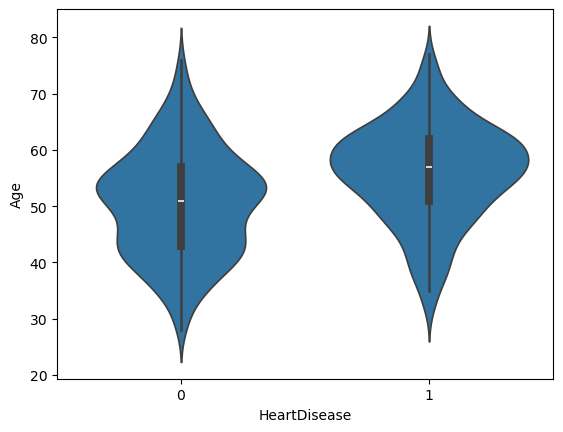

In [65]:
sns.violinplot(x=df['HeartDisease'], y=df['Age'])

<Axes: >

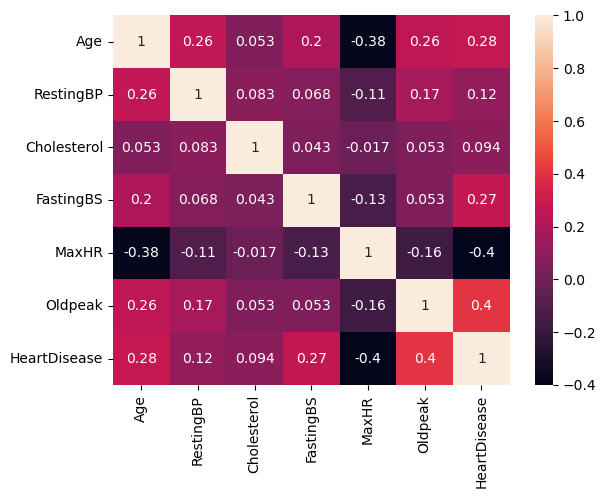

In [67]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Preprocessing and Cleaning

In [73]:
df_encoded = pd.get_dummies(data=df, columns=['ChestPainType','RestingECG','ST_Slope'],drop_first=True )
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,M,140.0,289.0,0,172,N,0.0,0,True,False,False,True,False,False,True
1,49,F,160.0,180.0,0,156,N,1.0,1,False,True,False,True,False,True,False
2,37,M,130.0,283.0,0,98,N,0.0,0,True,False,False,False,True,False,True
3,48,F,138.0,214.0,0,108,Y,1.5,1,False,False,False,True,False,True,False
4,54,M,150.0,195.0,0,122,N,0.0,0,False,True,False,True,False,False,True


In [79]:
# Rename Sex to is_Male
df_encoded['Sex'].replace({"M":1, "F":0}, inplace=True)
df_encoded.rename(columns=({'Sex':'is_Male'}), inplace=True)
df_encoded.head()


,Age,is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,N,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,N,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,N,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,Y,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,N,0.0,0,False,True,False,True,False,False,True


In [93]:
# Replace column name ExerciseAngine with is_ExercisAngina and replace N with 0 and Y with 1 inside the column
df_encoded.rename(columns=({'ExerciseAngina':'is_ExerciseAngina'}), inplace=True)
df_encoded['is_ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True) 
df_encoded.head()

,Age,is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,is_ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


In [97]:
columns = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat',	'ST_Slope_Up']
for col in columns: 
    df_encoded[col] = df_encoded[col].astype(int) 
    

In [98]:
df_encoded.head()

,Age,is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,is_ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160.0,180.0,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138.0,214.0,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150.0,195.0,0,122,0,0.0,0,0,1,0,1,0,0,1


In [100]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
numericalColumns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[numericalColumns] = scaler.fit_transform(df_encoded[numericalColumns])
df_encoded.head()

,Age,is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,is_ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414853,0.832529,0,1.382928,0,-0.832432,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527192,-1.212922,0,0.754157,0,0.105664,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141317,0.719935,0,-1.525138,0,-0.832432,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303619,-0.574892,0,-1.132156,1,0.574711,1,0,0,0,1,0,1,0
4,0.051881,1,0.971022,-0.931438,0,-0.581981,0,-0.832432,0,0,1,0,1,0,0,1
